In [ ]:
''' 
Aim: Implement autoencoders and explore their applications in data
compression and denoising

An autoencoder is a type of artificial neural network designed to learn efficient
representations of input data, typically for dimensionality reduction, feature extraction,
denoising, or data compression.

Autoencoder consists of two main parts:
1. Encoder: Takes input data and compresses it into a smaller, latent representations also called as bottlenecks
            Encoder extracts important features while removing redundant info.
2. Decoder: Tries to reconstruct the original input from the compressed representation.
            The goal is to make the reconstructed output as close to the original input as
            possible.
'''

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3844 - val_loss: 0.1891
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1802 - val_loss: 0.1532
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1489 - val_loss: 0.1330
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1310 - val_loss: 0.1209
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1204 - val_loss: 0.1127
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1074 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1035 - val_loss: 0.0999
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1006 - val_loss: 0.0974
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0983 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968 - val_loss: 0.0947
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

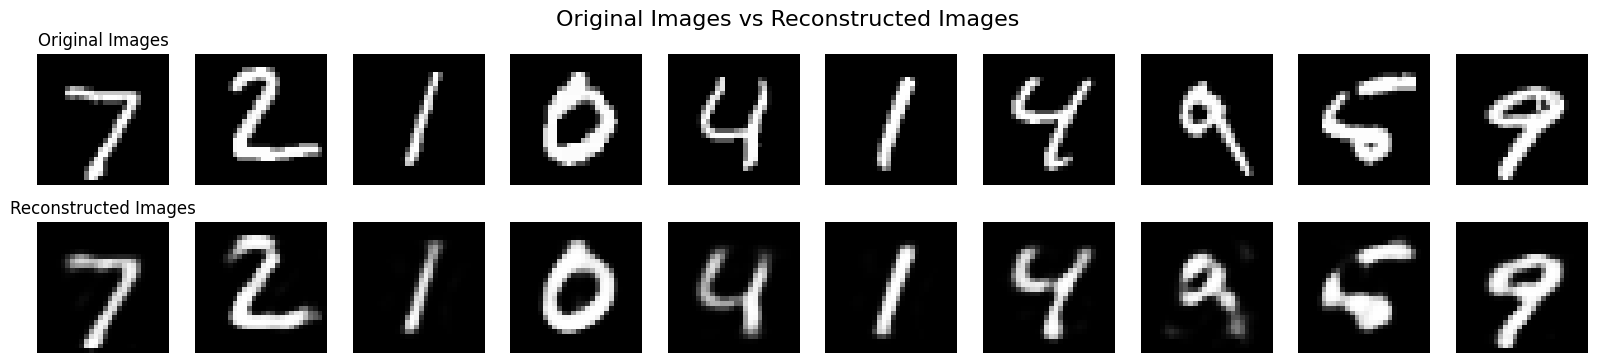

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0924 - val_loss: 0.5824
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0926 - val_loss: 0.5802
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - val_loss: 0.5855
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0926 - val_loss: 0.5953
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0924 - val_loss: 0.5923
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0928 - val_loss: 0.5991
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0926 - val_loss: 0.6077
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - val_loss: 0.6139
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - val_loss: 0.6194
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0924 - val_loss: 0.6204
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


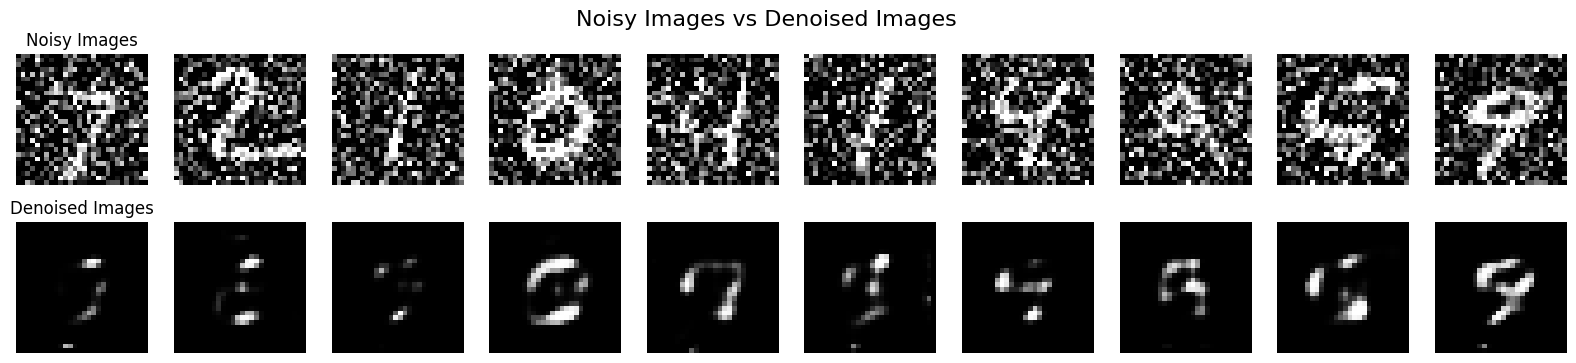

In [2]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for autoencoder
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Autoencoder architecture
encoding_dim = 32 # Dimension of encoded representation
# Encoder
input_image = Input(shape=(784,))
encoded_layer = Dense(encoding_dim, activation='relu')(input_image)
# Decoder
decoded_layer = Dense(784, activation='sigmoid')(encoded_layer)

# Autoencoder model
autoencoder = Model(input_image, decoded_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
validation_data=(x_test, x_test))

# Encode and decode test images
reconstructed_images = autoencoder.predict(x_test)

# Reshape to 28x28 images
original_images = x_test.reshape(-1, 28, 28)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

# Plot original and reconstructed images
def plot_images(original, reconstructed, title_original, title_reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    plt.suptitle(f"{title_original} vs {title_reconstructed}", fontsize=16)
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i], cmap='gray')
        if i == 0:
            ax.set_title(title_original, fontsize=12)
        plt.axis('off')
        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i], cmap='gray')
        if i == 0:
            ax.set_title(title_reconstructed, fontsize=12)
        plt.axis('off')
    plt.show()

plot_images(original_images, reconstructed_images, "Original Images", "Reconstructed Images")

# Add noise to test images
noise_factor = 0.5
noisy_images = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

# Train autoencoder on noisy images
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(noisy_images, x_test))

# Denoise images
denoised_images = autoencoder.predict(noisy_images)
denoised_images = denoised_images.reshape(-1, 28, 28)

# Plot noisy and denoised images
plot_images(noisy_images.reshape(-1, 28, 28), denoised_images, "Noisy Images", "Denoised Images")